# Modeling with the cleaned CarsandBids data
- supervised regression models to predict `price` with the features created in `data_cleansing.ipynb`

In [23]:
# importing requisite libraries
# generic
import pandas as pd
import numpy as np
np.random.seed(42) # for the sake of reproducibility
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("directory goes here")

In [24]:
filename = "file name goes here"
df = pd.read_csv(filename)

In [28]:
df.shape

(9924, 21)

In [25]:
df.columns

Index(['year', 'make', 'model_clean', 'mileage_clean', 'drivetrain',
       'body_style', 'seller', 'bid_count', 'reserve_status', 'num_views',
       'num_photos', 'title', 'fuel_type', 'displacement', 'num_cylinders',
       'is_rotary', 'turbocharged', 'supercharged', 'num_electric_motors',
       'trans', 'price'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9924 entries, 0 to 9923
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 9924 non-null   int64  
 1   make                 9924 non-null   object 
 2   model_clean          9924 non-null   object 
 3   mileage_clean        9924 non-null   int64  
 4   drivetrain           9924 non-null   object 
 5   body_style           9924 non-null   object 
 6   seller               9924 non-null   object 
 7   bid_count            9924 non-null   int64  
 8   reserve_status       9924 non-null   object 
 9   num_views            9924 non-null   int64  
 10  num_photos           9924 non-null   int64  
 11  title                9924 non-null   object 
 12  fuel_type            9924 non-null   object 
 13  displacement         9924 non-null   float64
 14  num_cylinders        9924 non-null   int64  
 15  is_rotary            9924 non-null   i

In [27]:
df.describe()

,year,mileage_clean,bid_count,num_views,num_photos,displacement,num_cylinders,is_rotary,turbocharged,supercharged,num_electric_motors,price
count,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000
mean,2005.241737,76004.585248,28.294639,10790.501008,116.975816,3.641268,6.286175,0.003930,0.289702,0.069629,0.068722,28134.168077
std,9.754722,55238.537521,13.446279,6158.634366,46.757899,1.556160,2.151691,0.062569,0.453647,0.254534,0.426986,31130.222823
min,1981.000000,5.000000,1.000000,2746.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000
25%,1999.000000,33200.000000,18.000000,7755.750000,83.000000,2.500000,5.000000,0.000000,0.000000,0.000000,0.000000,10500.000000
50%,2006.000000,67700.000000,27.000000,9539.000000,106.000000,3.500000,6.000000,0.000000,0.000000,0.000000,0.000000,17750.000000
75%,2013.000000,107100.000000,37.000000,11917.000000,140.000000,4.800000,8.000000,0.000000,1.000000,0.000000,0.000000,33000.000000
max,2023.000000,467400.000000,139.000000,120491.000000,443.000000,10.800000,12.000000,1.000000,1.000000,1.000000,4.000000,557000.000000


<AxesSubplot:xlabel='price'>

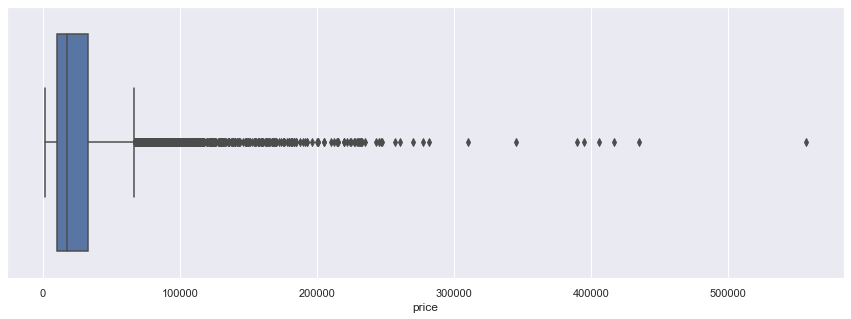

In [7]:
# checking outliers and the distribution
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data = df, x = "price")

<AxesSubplot:xlabel='price', ylabel='Count'>

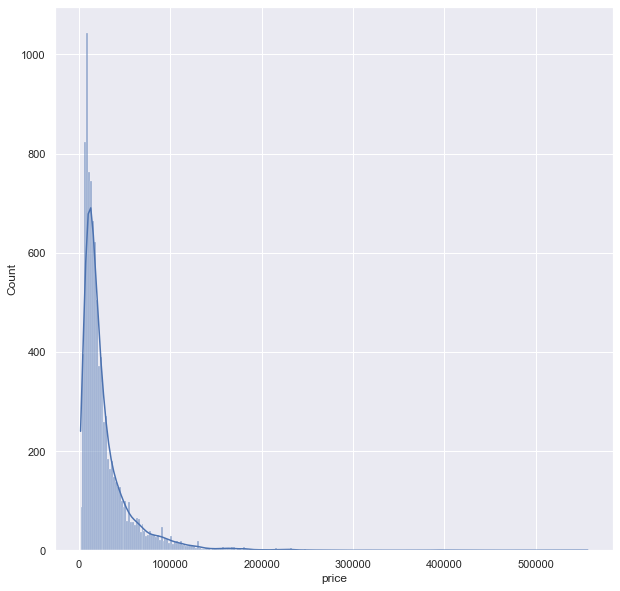

In [8]:
# plotting a histogram
sns.set(rc={'figure.figsize':(10,10)})
sns.histplot(x = df["price"], kde=True)

There appear to be some extreme outliers past the $250,000 mark

In [9]:
# removing them from the dataset to avoid leverage
df = df[df["price"] <= 250000]

Text(0.5, 1.0, 'Correlation Heatmap')

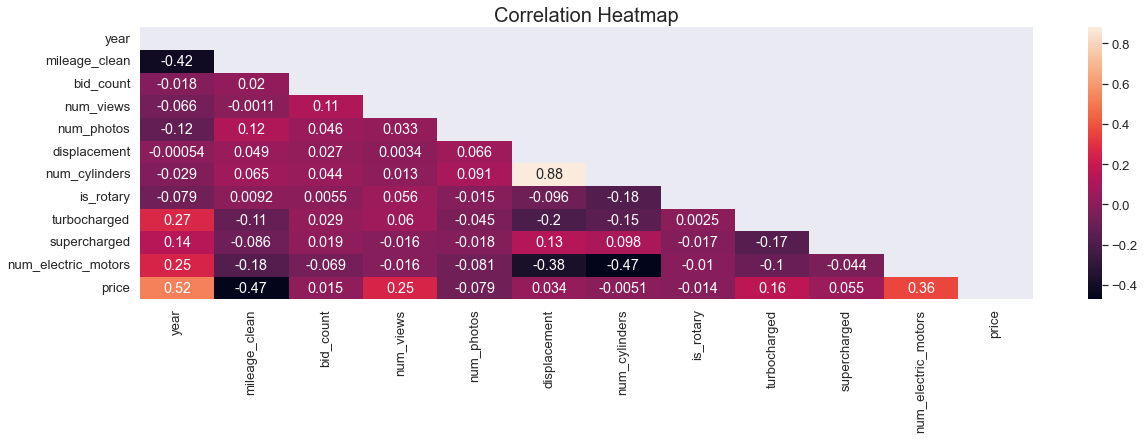

In [10]:
# plotting a correlational matrix
plt.figure(figsize=(20, 5))
sns.set(font_scale = 1.2)
mask = np.triu(np.ones_like(df.corr()))
corrplot = sns.heatmap(df.corr(), annot = True, mask = mask)
corrplot.set_title('Correlation Heatmap', fontdict={'fontsize':20})

In [21]:
# dummy coding categorical variables:
df1 = pd.get_dummies(df, columns = ["drivetrain", "body_style", "seller",
                                    "reserve_status", "title", "fuel_type",
                                    "num_electric_motors", "trans", "make"], drop_first = True)
df1.head()

(9911, 141)


,year,model_clean,mileage_clean,bid_count,num_views,num_photos,displacement,num_cylinders,is_rotary,turbocharged,...,make_Tesla,make_Toyota,make_UAZ,make_Vanderhall,make_Volkswagen,make_Volvo,make_WaterCar,make_Winnebago,make_Yugo,make_ZENN
0,1995,S6,288200,33,9032,72,2.2,5,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2022,Maverick,200,13,7275,74,2.5,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,GT-R,39500,26,10609,51,3.8,6,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2018,R8,10400,26,10057,62,5.2,10,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2007,Boxster,55400,22,5528,99,2.7,6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df1.shape

(9911, 141)

In [12]:
# splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X = df1.drop(["price", "model_clean"], axis = 1) # dropping model_clean--cardinality too high
y = df1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [13]:
# importing evaluation metrics for regression models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

# function for model evaluation
def model_eval(model, X_train, y_train, X_test, y_test):
    '''
    Generate metrics to evaluate models and display scatterplot of actual vs. predicted
    '''
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    actual_fitted = pd.DataFrame({"y_test" : y_test, "y_pred": y_pred, "residuals":residuals})
    metrics = []
    print("Summary Stats of Predictions:")
    print(actual_fitted["y_pred"].describe())
    print("\nModel Metrics:")
    print("\nR2 Score: ", r2_score(y_test, y_pred))
    metrics.append(r2_score(y_test, y_pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    metrics.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    metrics.append(mean_absolute_error(y_test, y_pred))
    print(f"Mean Absolute Percentage Error: % {round(mean_absolute_percentage_error(y_test, y_pred) * 100, 2)}")
    metrics.append(round(mean_absolute_percentage_error(y_test, y_pred), 2))
    print("Cross Validation Score: ", cross_val_score(model, X_train, y_train, cv = 10).mean())
    metrics.append(cross_val_score(model, X_train, y_train, cv = 10).mean())
    y_vs_yhat = sns.scatterplot(data = actual_fitted, x = "y_test", y = "y_pred")
    y_vs_yhat.set_xlabel("Actual Values")
    y_vs_yhat.set_ylabel("Predicted Values")
    y_vs_yhat.set(title = "Actual vs. Predicted Values")
    lims = [0, 250000]
    y_vs_yhat.plot(lims, lims, '-r', linewidth = 3)
    return metrics

Summary Stats of Predictions:
count      2478.000000
mean      27155.556242
std       22851.012445
min      -35278.527892
25%       12567.511574
50%       23595.660676
75%       38343.444697
max      191061.802144
Name: y_pred, dtype: float64

Model Metrics:

R2 Score:  0.6137958904109055
Root Mean Squared Error:  16566.503902146094
Mean Absolute Error:  10719.146086399516
Mean Absolute Percentage Error: % 61.35
Cross Validation Score:  0.6301132915630643


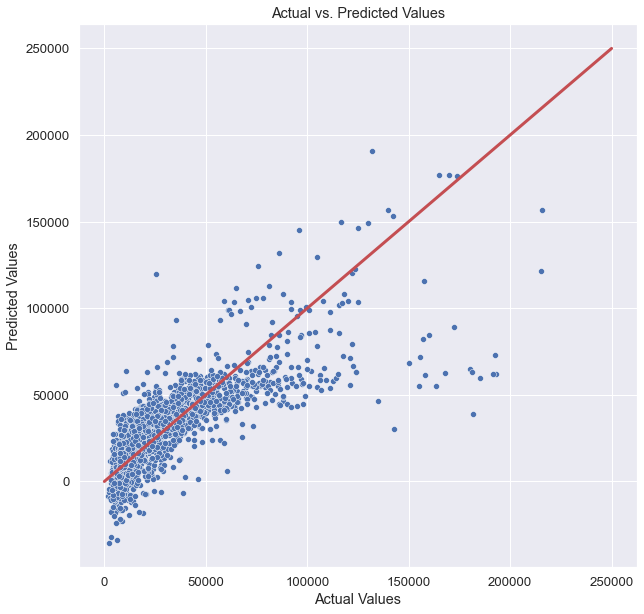

In [14]:
# linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
Linear_Regression = model_eval(lr, X_train, y_train, X_test, y_test)
# minimum prediction was negative, a linear model is probably not the best solution
# cars with low actual prices are often underestimated
# assumption of homoskedasticity is violated
# tree based models could be a better option

Summary Stats of Predictions:
count      2478.000000
mean      27474.735270
std       28663.909792
min        2000.000000
25%       10550.000000
50%       17750.000000
75%       31853.500000
max      232000.000000
Name: y_pred, dtype: float64

Model Metrics:

R2 Score:  0.521612852064019
Root Mean Squared Error:  18437.9304975774
Mean Absolute Error:  10082.6202582728
Mean Absolute Percentage Error: % 44.25
Cross Validation Score:  0.58781378882905


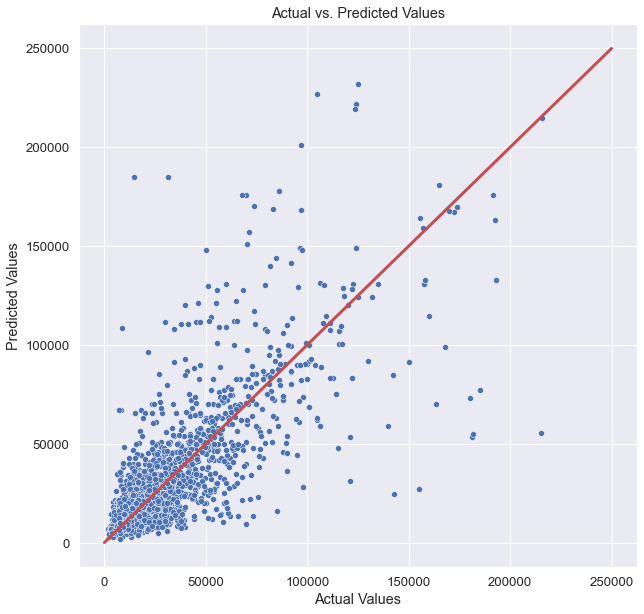

In [15]:
# regression tree
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion="squared_error")
Regression_Tree = model_eval(dtr, X_train, y_train, X_test, y_test)
# regression tree did slightly better and had realistic results--all predictions were positive

Summary Stats of Predictions:
count      2478.000000
mean      27154.305569
std       24154.659195
min        4418.620000
25%       12149.540000
50%       18712.035000
75%       31980.717500
max      176505.000000
Name: y_pred, dtype: float64

Model Metrics:

R2 Score:  0.7844933207788637
Root Mean Squared Error:  12375.21603426259
Mean Absolute Error:  6877.366464891042
Mean Absolute Percentage Error: % 31.84
Cross Validation Score:  0.7932344296689194


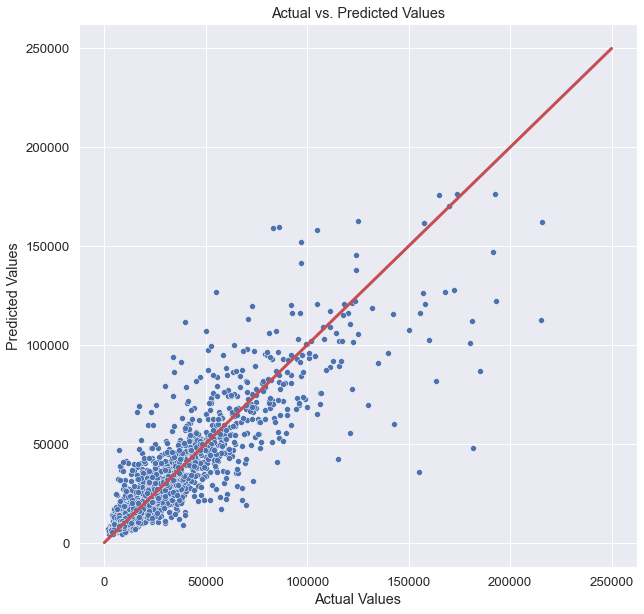

In [16]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion = "squared_error", n_estimators = 100, n_jobs=-1)
Random_Forest = model_eval(rf, X_train, y_train, X_test, y_test)
# random forest did even better, lowest error metrics so far and all predictions positive

Summary Stats of Predictions:
count      2478.000000
mean      26914.218750
std       25260.302734
min       -4144.563965
25%       11751.425781
50%       18235.149414
75%       31483.676758
max      190426.921875
Name: y_pred, dtype: float64

Model Metrics:

R2 Score:  0.8174500405010939
Root Mean Squared Error:  11389.72641220768
Mean Absolute Error:  6606.707485959451
Mean Absolute Percentage Error: % 30.39
Cross Validation Score:  0.817860868756723


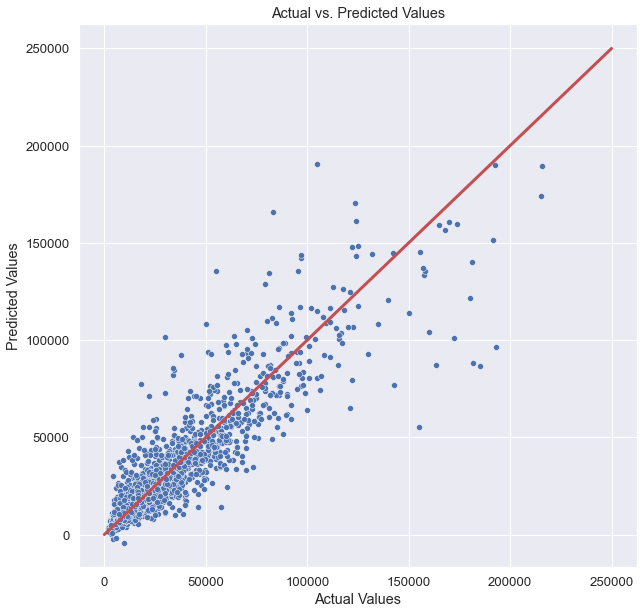

In [19]:
# XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor(n_jobs = -1)
XG_Boost = model_eval(xgb, X_train, y_train, X_test, y_test)
# XGBoost performed the best, but did have some negative predictions

# muting future errors
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
metric_comparison = pd.DataFrame({"Linear Regression":Linear_Regression,
                                  "Regression Tree":Regression_Tree,
                                  "Random Forest":Random_Forest,
                                  "XGBoost":XG_Boost},
                                 index=["R-Squared", "RMSE", "MAE", "MAPE", "10-Fold CV R-Squared"])
metric_comparison.swapaxes("index", "columns")

,R-Squared,RMSE,MAE,MAPE,10-Fold CV R-Squared
Linear Regression,0.613796,16566.503902,10719.146086,0.61,0.630113
Regression Tree,0.521613,18437.930498,10082.620258,0.44,0.592604
Random Forest,0.784493,12375.216034,6877.366465,0.32,0.789316
XGBoost,0.817450,11389.726412,6606.707486,0.30,0.817861
